 ## **#1 Load the Data :** 

In [1]:
# Import the librairies that we will need : 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import datetime
from datetime import date

In [2]:
# Load the dataframe
df = pd.read_csv('customer_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


## **#2 Get the first informations about the Dataset :**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **List of cleaning tasks :** 

- #1 Identify and clean missing values : 
- #2 Explore the Z_CostContact and Z_Revenue attributes
- #3 Check for inconsistencies and ambiguous values in categorical variables Education, Marital status 
- #4 Parse the Dt_Costumer from object to datetime 


## **#1 Deal with missing values if there are some :**

In [4]:
def per_missing(df) : 
    # Create the serie with missing values : 
    missing_values = df.isnull().sum()
    non_missing_values = df.count()
    per_miss = missing_values/non_missing_values*100
    return per_miss

print(per_missing(df)[:10])

# 1 % of the income feature is missing, we can fill the values with most comon, mean, median or even with a machine learning algorithm. 
# Here are probably going to use the median and change if the results are bad. 

ID                0.000000
Year_Birth        0.000000
Education         0.000000
Marital_Status    0.000000
Income            1.083032
Kidhome           0.000000
Teenhome          0.000000
Dt_Customer       0.000000
Recency           0.000000
MntWines          0.000000
dtype: float64


In [5]:
# Filling the NaN or Null values with the median 
df['Income'].fillna(value=df['Income'].median(), inplace = True)
print(per_missing(df)[:10])

ID                0.0
Year_Birth        0.0
Education         0.0
Marital_Status    0.0
Income            0.0
Kidhome           0.0
Teenhome          0.0
Dt_Customer       0.0
Recency           0.0
MntWines          0.0
dtype: float64


## **#2 Let's find out what's behind the Z_CostContact and Z_Revenue columns**

In [6]:
Z_CostContact_values = df['Z_CostContact'].value_counts()
Z_Revenue = df['Z_Revenue'].value_counts()

print(Z_CostContact_values) 
print(Z_Revenue)

# Looks like our columns are only bearing the same value, in this case those features have no impact in the model whatsoever so we can drop them. 

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


### Looks like our columns are only bearing the same value, in this case those features have no impact in the model whatsoever so we can drop them.

### Let's drop those columns since they are no use for the segmentation :

In [7]:
# Let's drop those columns since they are no use for the segmentation
col_to_drop = ['Z_CostContact','Z_Revenue']
df.drop(col_to_drop, axis=1, inplace=True)

## **#3 Check for inconsistencies and ambiguous values:**

- Is this person single or in a relationship ? 
- Does relationship status affects the way you shop ? Does being a widow instead of a single affect your purchasing behavior ? 

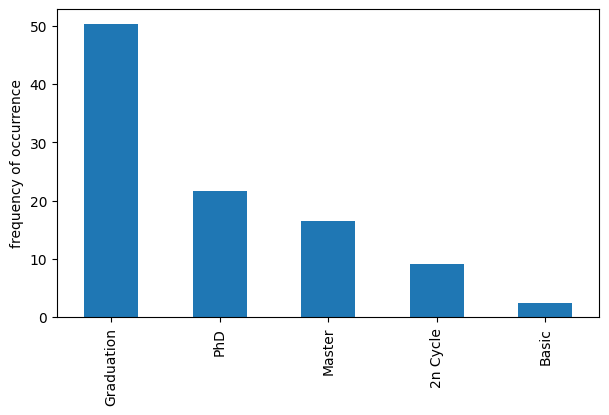

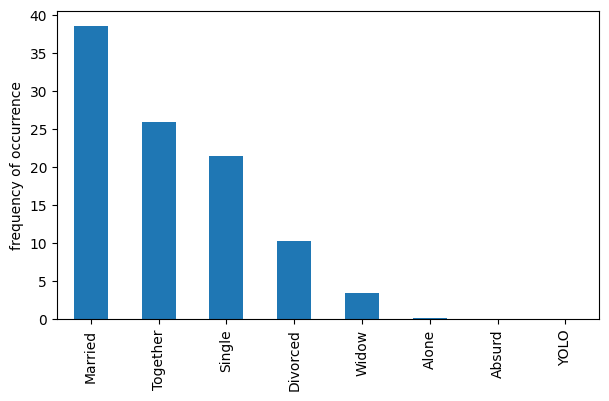

None


In [8]:
# WE purposefuly don't look at 'Dt_costumer' since it's just going to be the dates 

def unique_cat_var(df) : 
    col = [i for i in df.columns if df[i].dtypes == object and i!= 'Dt_Customer']
    for i in col : 
        plt.figure(figsize=(7,4),dpi=100)
        a = df[i].value_counts()/df[i].count()*100
        a.plot(kind='bar')
        plt.ylabel("frequency of occurrence")
        plt.show()

print(unique_cat_var(df))

# Clearly we can separate this in "Couple" and "Alone "

## **#4 Parse the Dt_Costumer from object to datetime**

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


## **#5 Investigate and delete outliers**

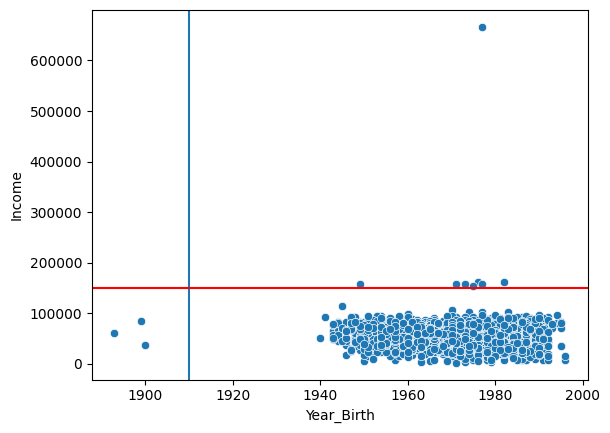

In [10]:
sns.scatterplot(x = df['Year_Birth'],y = df['Income'])
plt.axvline(x=1910)
plt.axhline(y=150000, color='r', linestyle='-')

<AxesSubplot: >

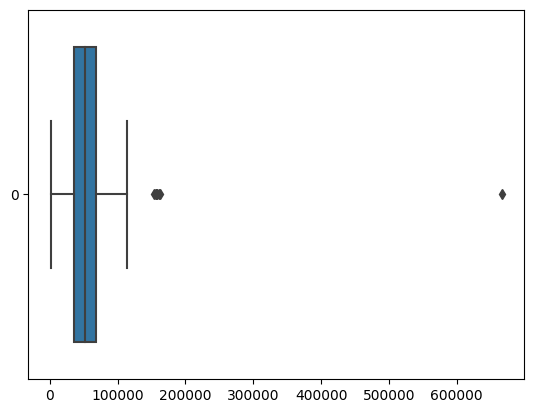

In [11]:
sns.boxplot(data=df['Income'],orient="h")

<AxesSubplot: >

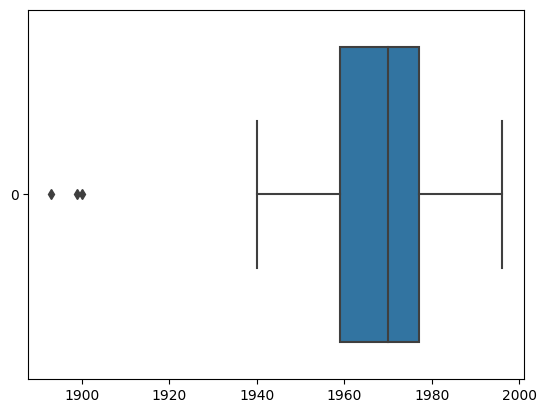

In [12]:
 sns.boxplot(data=df['Year_Birth'], orient="h")

In [13]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Year_Birth"]>1910)]
df = df[(df["Income"]<150000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2229


In [14]:
# Create the Age attribute : 
df['Age']= max(df['Dt_Customer'].dt.year) - df['Year_Birth']

# Create the Total_spent attribute : 
df['Total_spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#Create the Eldership attribute :
last_date = max(df['Dt_Customer'].dt.date)
df['Eldership']=df['Dt_Customer']
df['Eldership'] = pd.to_numeric(df['Eldership'].dt.date.apply(lambda x: (last_date - x)).dt.days)

# Remap Marital Status and Education attributes : 
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

# Create Children and Has_Child Attributes : 
df['Children']=df['Kidhome']+df['Teenhome']
df['Has_child'] = np.where(df.Children> 0, 1, 0)

# Create reduction accepted : 

df['Promo_Accepted']= df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent,Eldership,Children,Has_child,Promo_Accepted
0,5524,1957,Postgraduate,Alone,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,57,1617,663,0,0,1
1,2174,1954,Postgraduate,Alone,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,60,27,113,2,1,0
2,4141,1965,Postgraduate,In couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,49,776,312,0,0,0
3,6182,1984,Postgraduate,In couple,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,30,53,139,1,1,0
4,5324,1981,Postgraduate,In couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,33,422,161,1,1,0


# DATA PREPROCESSING :

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

- Delete redundant values 
- Label encoding the categorical features
- Scaling the features using the standard scaler 

In [15]:
# Let's delete redundant values, the ID also will not be of any help when clustering : 

X = df.copy()
X = df.drop(['Dt_Customer','ID','Year_Birth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response','Complain'], axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder

#Select only categorical variables 
cat_variables = [i for i in X.columns if X.dtypes[i] == 'object']

# Import Labelencoder in LE
LE = LabelEncoder()

for cat in cat_variables : 
    X[cat] = X[[cat]].apply(LE.fit_transform)
    

In [17]:
from sklearn.preprocessing import StandardScaler 

# Define the standard scaler : 
scaler = StandardScaler() 

#Here you have to drop the Dt_Customer because StandardScaler cannot scale a Datetime object : 

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

<AxesSubplot: >

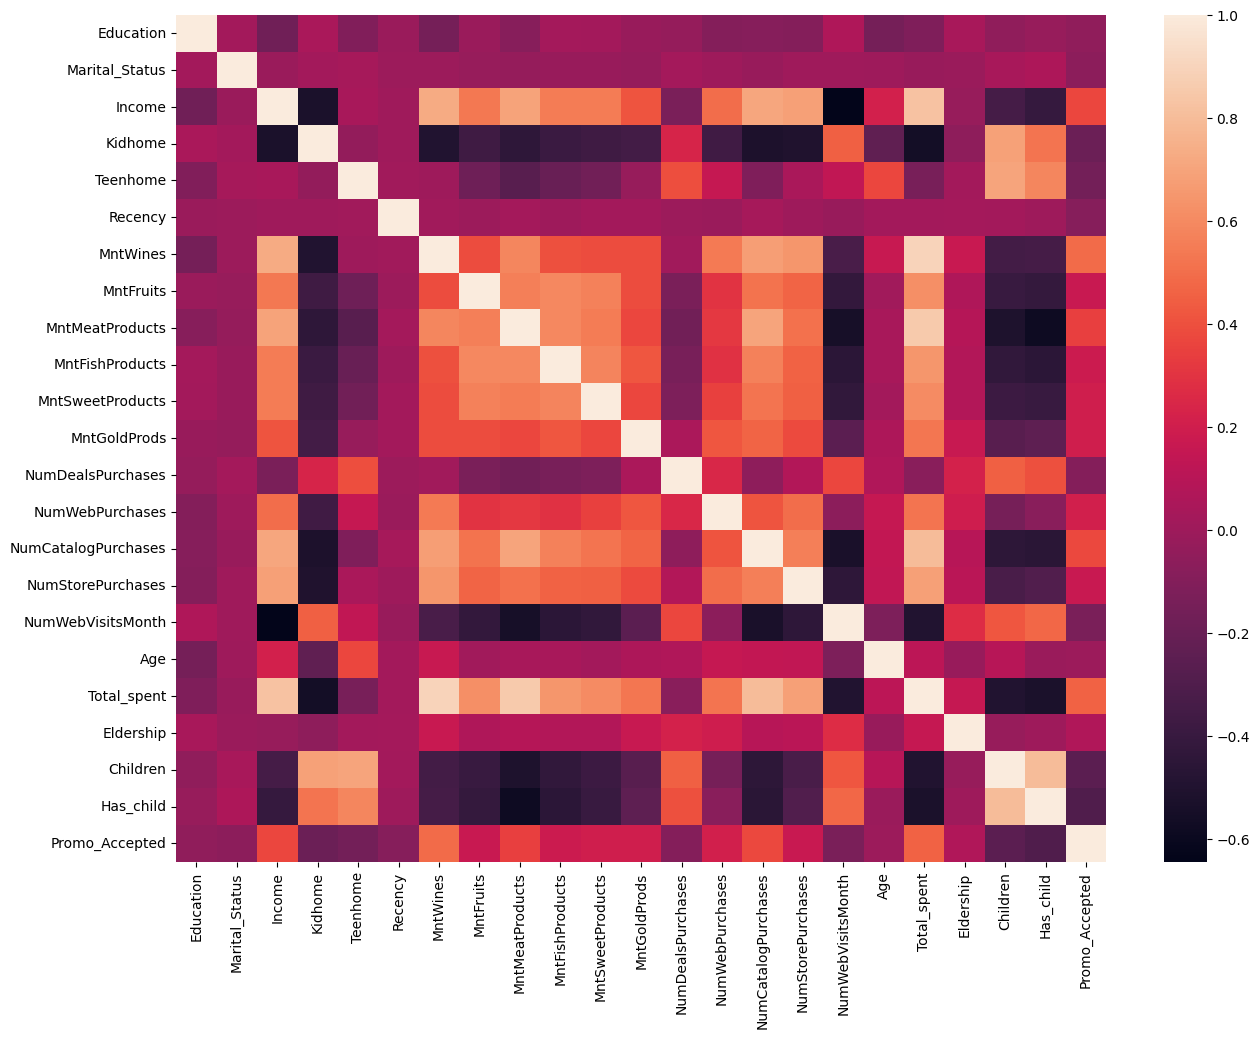

In [18]:
# calculate the correlation matrix
corr = X_scaled.corr()

# plot the heatmap
plt.figure(figsize =(15,11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

In [19]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_scaled, axis=0)
cov_mat = np.cov(X_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

Now having obtained the eigenvalues and eigenvectors, we will group them together by creating a list of eigenvalue, eigenvector tuples (immutable Python data objects). Following on from this we will sort the list in order of Highest eigenvalue to lowest eigenvalue and then use the eigenvalues to calculate both the individual explained variance and the cumulative explained variance for visualisation.

In [20]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [21]:
var_exp

[35.63829727870661,
 11.549782003610424,
 6.640503117021492,
 5.317594284340167,
 4.578898918868661,
 4.421724420152872,
 4.3052210076665505,
 3.740914302858605,
 3.3297798316080227,
 2.9854145200809112,
 2.6322006956092516,
 2.4985442478310316,
 1.974999479447184,
 1.9079442253897367,
 1.7340895874349684,
 1.655578203843145,
 1.3864601643614993,
 1.2603875826031858,
 0.9650723291653517,
 0.8522879733362635,
 0.624305826064066,
 5.040887097936492e-16,
 -7.280993803991124e-15]

Now time to plot the explained variance graphs to see how our contributions look like. The cumulative explained variance is visualised in a blue step-plot while the individual explained variance is plotted via green bar charts as follows:

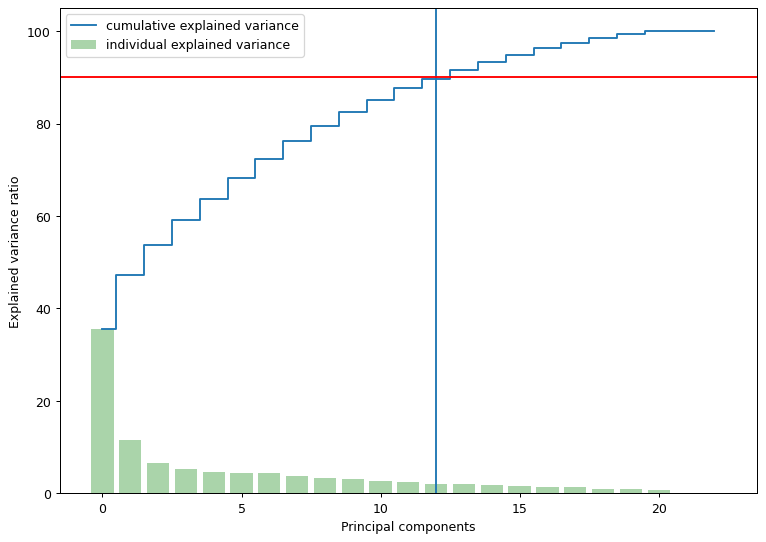

In [22]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 7), dpi = 90)
plt.bar(range(23), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(23),cum_var_exp,where='mid',label='cumulative explained variance')
plt.axvline(x=12)
plt.axhline(y=90, color='r', linestyle='-')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From the plot above, it can be seen that approximately 90% of the variance can be explained with the 18 principal components. Therefore for the purposes of this notebook, let's implement PCA with 18 components 

In [23]:
#Initiating PCA to reduce dimentions aka features to 18

from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_scaled)
columns = ["PCA{}".format(i) for i in range(13)]
PCA_ds = pd.DataFrame(pca.transform(X_scaled), columns=columns)
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA0,2229.0,6.156284e-17,2.863649,-5.745203,-2.601062,-0.838742,2.352866,8.013927
PCA1,2229.0,-1.217310e-16,1.630228,-4.006630,-1.332621,-0.183339,1.221076,5.633783
PCA2,2229.0,-4.143413e-18,1.236123,-3.367692,-0.861733,-0.001684,0.846398,5.643743
PCA3,2229.0,-3.466645e-17,1.106163,-4.863516,-0.553407,0.007326,0.541331,5.116603
PCA4,2229.0,-7.711698e-17,1.026460,-3.402511,-0.664818,-0.052681,0.645095,3.746833
PCA5,2229.0,-1.892709e-18,1.008689,-2.789603,-0.726441,-0.009160,0.697021,2.837992
PCA6,2229.0,1.049208e-16,0.995312,-2.246051,-0.789091,-0.123632,0.762482,3.342369
PCA7,2229.0,-2.515933e-17,0.927791,-2.144347,-0.635539,-0.183887,0.360788,3.997036
PCA8,2229.0,3.367029e-17,0.875325,-2.834598,-0.578299,0.037937,0.567042,4.229020
PCA9,2229.0,3.098065e-17,0.828827,-3.095202,-0.463077,-0.046651,0.381075,5.589905


<AxesSubplot: >

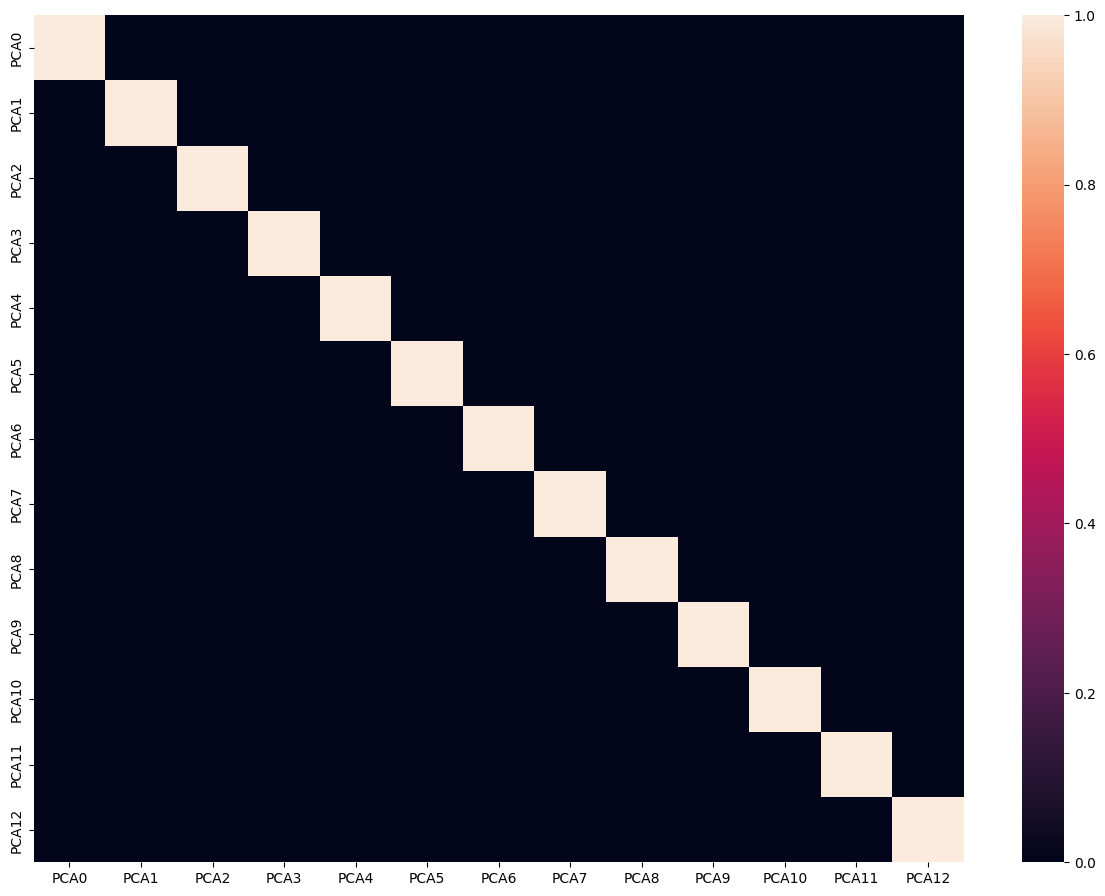

In [24]:
# calculate the correlation matrix
corr = PCA_ds.corr()

# plot the heatmap
plt.figure(figsize =(15,11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## **Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

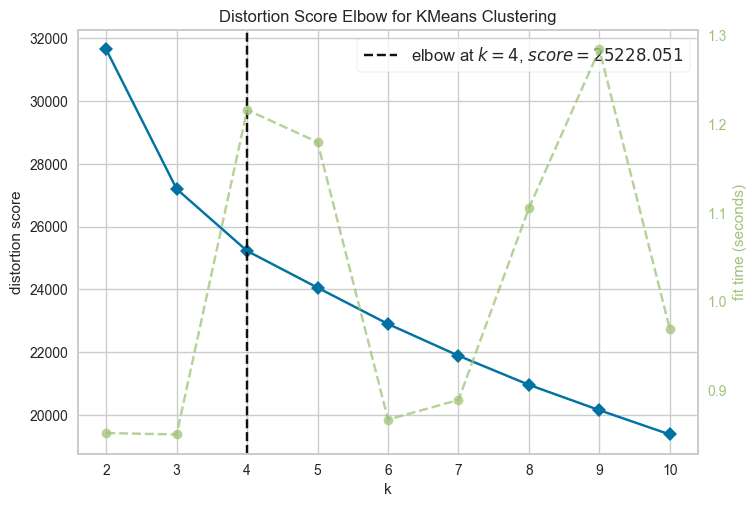

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [26]:
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


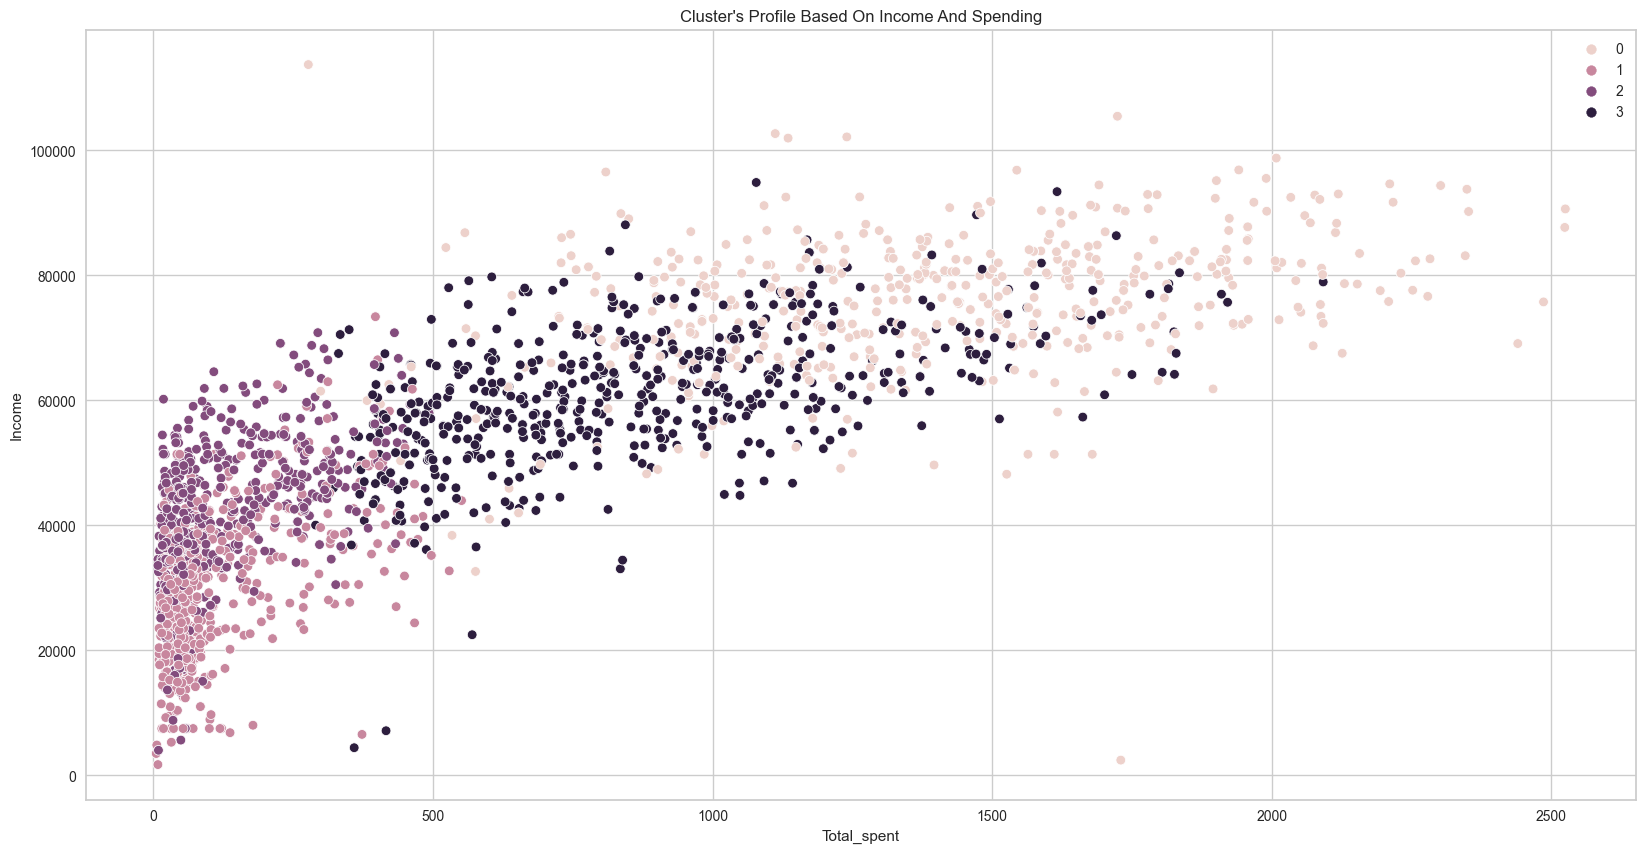

In [28]:
plt.figure(figsize=(20,10))
pl = sns.scatterplot(x = "Total_spent", y = "Income",hue="Cluster",data = X)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Income vs spending plot shows the clusters pattern : 

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & average income
- group 3: low spending & low income


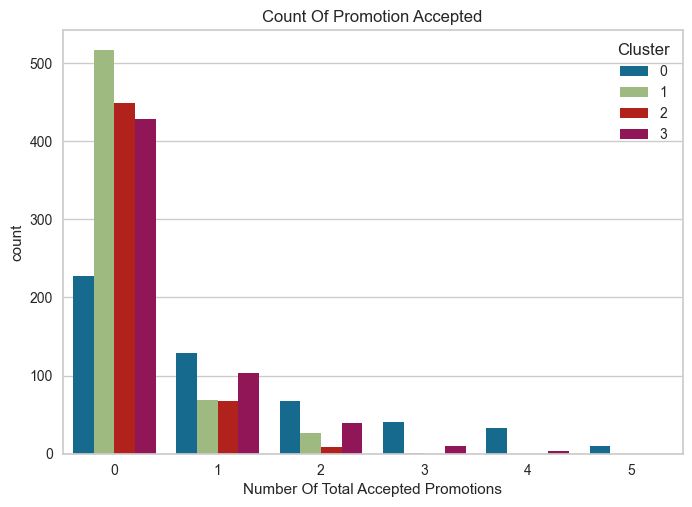

In [29]:
plt.figure()
pl = sns.countplot(x="Promo_Accepted",hue="Cluster",data = X)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#### We can clearly focus our promotions towards the group 1 & 0

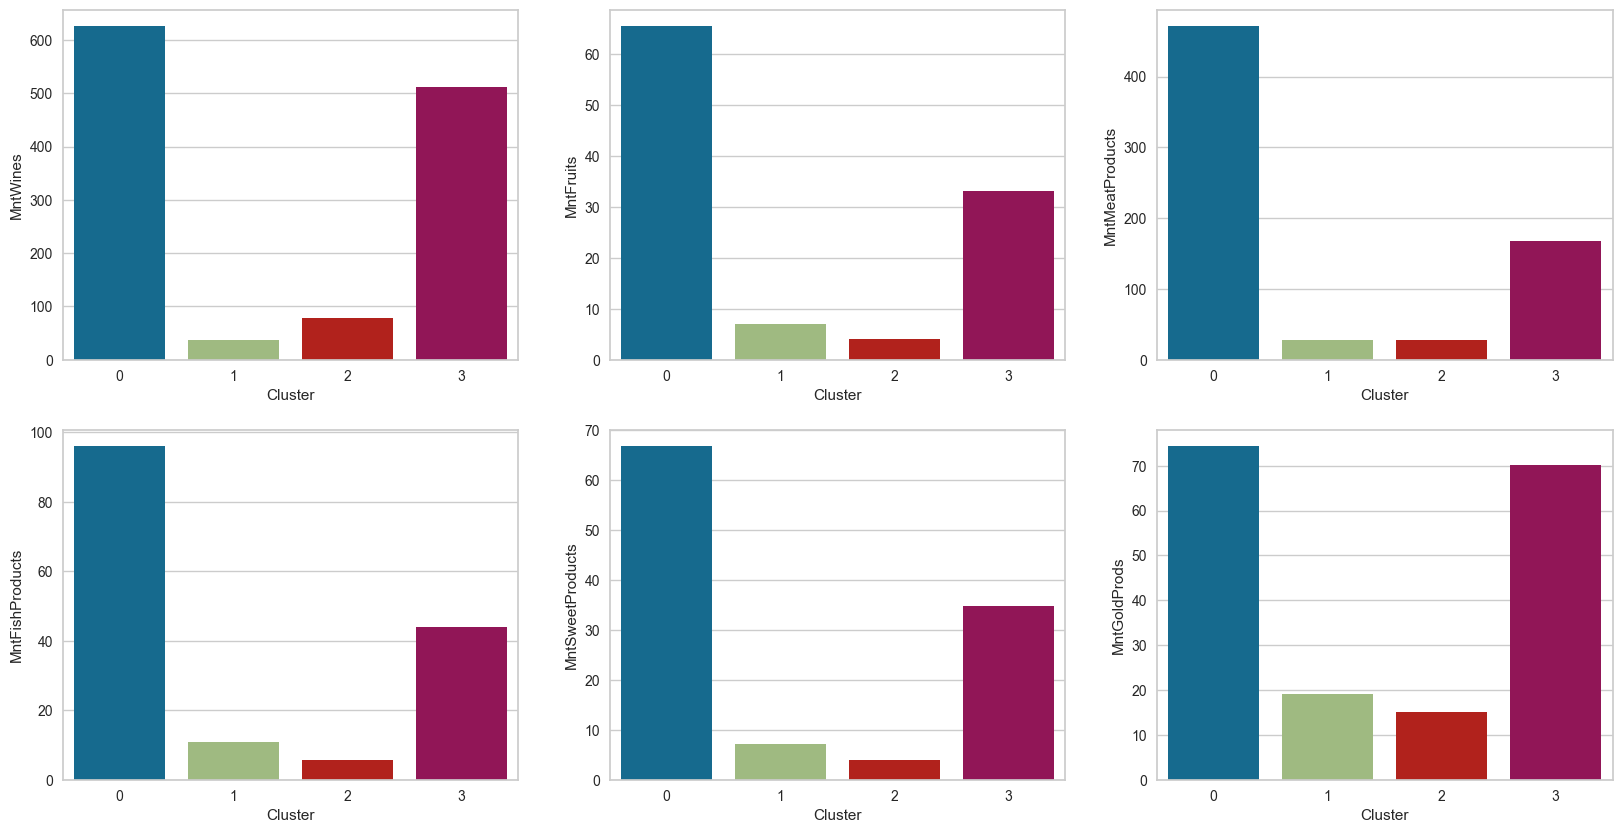

In [30]:
products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
values = X.groupby('Cluster').mean()

fig, ax = plt.subplots(2, 3,figsize=(20, 10))

ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

sns.barplot( y = values["MntWines"], x =   values.index,ax=ax1) 
sns.barplot( y = values["MntFruits"], x =   values.index,ax=ax2) 
sns.barplot( y = values["MntMeatProducts"], x =   values.index,ax=ax3) 
sns.barplot(y = values["MntFishProducts"], x =   values.index,ax=ax4) 
sns.barplot(y = values["MntSweetProducts"], x =  values.index,ax=ax5) 
sns.barplot(y = values["MntGoldProds"], x =   values.index,ax=ax6) 

plt.show()

### Distribution of average spent by cluster and by products